<a href="https://colab.research.google.com/github/SiraHaruethaipree/Covid-xray-image-classification/blob/main/covidx_cnn_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 x-ray image classification 

การระบาดใหญ่ของ COVID-19 ยังคงส่งผลกระทบร้ายแรงต่อสุขภาพและความเป็นอยู่ของประชากรโลก ขั้นตอนสำคัญในการต่อสู้กับ COVID-19 คือการตรวจคัดกรองผู้ป่วยที่ติดเชื้ออย่างมีประสิทธิภาพ โดยวิธีการคัดกรองที่วิธีหนึ่งคือการตรวจทางรังสีวิทยาโดยใช้การถ่ายภาพรังสีทรวงอก ซึ่งเบื้องต้นพบว่าผู้ป่วยแสดงภาพรังสีทรวงอกที่ผิดปกติซึ่งเป็นลักษณะของผู้ติดเชื้อ COVID-19 ด้วยเหตุนี้จึงเกิดการใช้ความรู้ทางด้าน convolutional neural network มาประยุกต์ใช้ในการแบ่งแยกรูปภาพจากการเอกซเรย์ปอดว่า ผู้ป่วยนั้นติดโควิดหรือไม่ติดโควิด

# Introduction 

ตามที่กล่าวไปข้างต้นภาพ x-ray หรือที่เรียกว่า CXR อาจจะเป็นอีกหนทางหนึ่งในการตรวจสอบการติดเชื้อโควิด นอกจากวิธีการทำ RT-PCR และยังสามารถตรวจสอบอาการความรุนแรงที่เกิดขึ้นกับปอดได้อีกด้วย 
แต่อย่างไรก็ตาม ปัญหาใหญ่อีกประการหนึ่งคืองานด้านนี้ต้องการนักรังสีวิทยาที่เชี่ยวชาญโดยเฉพาะมาช่วยในการตีความภาพถ่าย x-ray ที่มีความละเอียดอ่อน บวกกับจำนวนของปู้เชี่ยวชาญที่มีน้อยเมื่อเทียบกับการติต่อของโรค
ด้วยเหตุนี้ จะเป็นเรื่องที่ดีถ้าหากว่ามันสามารถนำไปวินิจฉัยโดยให้คอมพิวเตอร์ช่วยในการวินิจฉัยได้ 

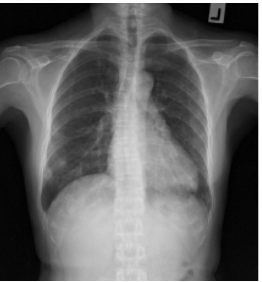

การวินิจฉัย ภาพที่ด้านบน ผู้ป่วยหญิงไทยอายุ51 ปีมีอาการไข้น้ำมูก วินิจฉัยเป็นปอดอักเสบติดเชื้อ COVID-19 
พบลักษณะ ground glass and patchy opacities ในปอดทั้งสองข้าง (bilateral involvement) พื้นที่ของ
ปอดที่พบเป็นบริเวณส่วนกลางและส่วนล่าง (middle and lower zones) โดยพบการกระจายตัวในบริเวณปอดส่วนนอก (peripheral distribution) 

จากการวินิจฉัยจะเห็นได้เลยว่าผู้ที่จะทำงานในการวินิจฉัยโรคโดยภาพ x-ray นั้นไม่ใช่เรื่องง่ายเลย และต้องอาศัยความเชี่ยวชาญความรู้ทางด้านนี้โดยเฉพาะ 

ภาพจาก : วารสารวิชาการสาธารณสุข 2564 ปีที่ 30 ฉบับเพิ่มเติม 1

# Dataset 

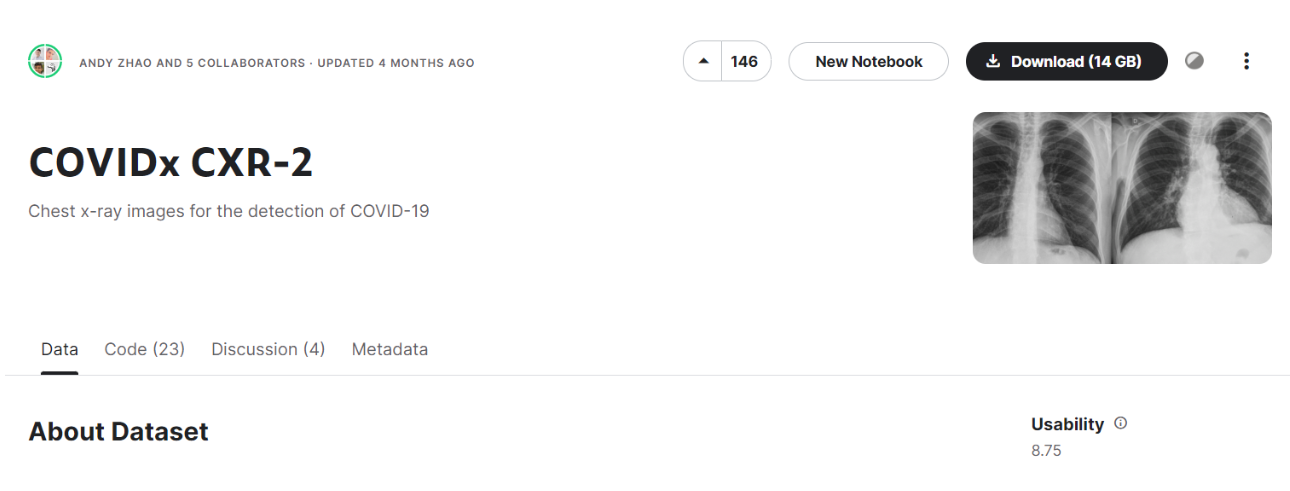

Dataset ที่ใช้มาจาก kaggle ที่มีชื่อว่า Covidx CXR-2 เป็น dataset ที่ได้มีการรวบรวมรูปถ่ายทาง x-ray ของปอด ที่มีการถ่ายผู้ที่ติดเชื้อและไม่ติดเชื้อ มาใช้ในการทำ classsify รูปภาพ ซึ่ง dataset จะประกอบไปด้วยชุดข้อมูล train จำนวน 29986 ภาพ และชุดข้อมูล test set จะมีจำนวนทั้งหมด 400 ภาพ ซึ่งข้อมูลภาพ x-ray จะเป็นข้อมูลที่ได้ทำการเก็บมาจากโรงพยาบาลต่างของประเทศแคนาดา และนอกจากนั้นยังมีข้อมูลที่มีการระบุ class ของรูปต่างๆและ filename ของรูปนั้นๆ ถูกแยกออกมาเก็บไว้ใน train.txt และ test.txt 

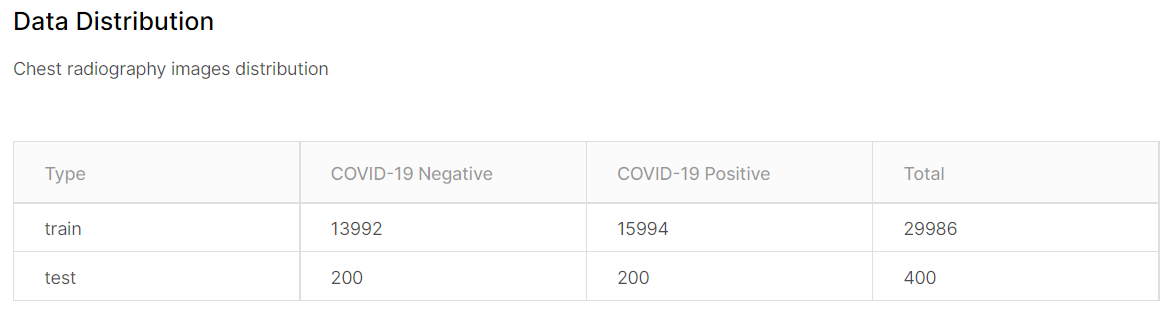

# Download dataset 

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 34.4 MB/s 


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"guisira","key":"05ff07f8466e08bc8b1ec4b211fba205"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download andyczhao/covidx-cxr2

100% 12.9G/12.9G [04:57<00:00, 66.3MB/s]
100% 12.9G/12.9G [04:57<00:00, 46.5MB/s]


In [ ]:
! unzip /content/covidx-cxr2.zip

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
  inflating: train/aead3682-bdf4-4f43-8468-8e6ac3cd41fa.png  
  inflating: train/aeae6cbc-d713-4760-845c-fcc93ed5ad64.png  
  inflating: train/aeaf6ffd-ff7e-48cc-b31f-175a5e79b415.png  
  inflating: train/aeb2a32c-595a-44c2-b827-c6ce0f6ff4f3.png  
  inflating: train/aeb6324d-08d5-426b-9a60-bc39d5151edb.png  
  inflating: train/aeb99fe0-d9f2-4122-8abf-e7f933f71f80.png  
  inflating: train/aebb48db-2f6f-41ad-87e7-d90c5620187e.png  
  inflating: train/aebb5625-cbea-4e11-9a9a-19708903ed1b.png  
  inflating: train/aebf9717-f500-44ac-87cd-273f24e0c3ce.png  
  inflating: train/aec1daa4-1910-4270-8de2-9abe6f3b1bf0.png  
  inflating: train/aec5b2e5-ceff-4e21-a089-19efcd0c3d45.png  
  inflating: train/aec849c0-4ef4-4d4e-9d09-573f1ce4cbd1.png  
  inflating: train/aec8c4ac-c66d-4523-a3df-278d0b7bead7.png  
  inflating: train/aeca7c41-8768-4f70-8bc7-5427c4718782.png  
  inflating: train/aecb2f65-5824-4770-ae82-2b6dc9f8905d.png  
  inflating: 

# Import library and dataset

ในส่วนนี้จะเป็นการ import library ที่ต้องใช้กับจัดการส่วนของ dataset

In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import albumentations as A
import tensorflow as tf 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from skimage.filters import unsharp_mask

from termcolor import colored
from colorama import Fore, Back, Style
# colored output
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

In [ ]:
!nvidia-smi

Mon Oct 10 05:46:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
train_df = pd.read_csv("/content/train.txt",sep = " ", names = ["patient_id", "filename", "labels", "data_source"])
train_df.head()

,patient_id,filename,labels,data_source
0,5,ARDSSevere.png,negative,cohen
1,25,acute-respiratory-distress-syndrome-ards-1.jpg,negative,cohen
2,26,acute-respiratory-distress-syndrome-ards.jpg,negative,cohen
3,27,ards-secondary-to-tiger-snake-bite.png,negative,cohen
4,28,pneumocystis-pneumonia-2-PA.png,negative,cohen


In [ ]:
test_df = pd.read_csv("/content/test.txt",sep = " ", names = ["patient_id", "filename", "labels", "data_source"])
test_df.head()

,patient_id,filename,labels,data_source
0,419639-003251,MIDRC-RICORD-1C-419639-003251-46647-0.png,positive,ricord
1,419639-001464,MIDRC-RICORD-1C-419639-001464-39871-0.png,positive,ricord
2,419639-000918,MIDRC-RICORD-1C-419639-000918-78965-0.png,positive,ricord
3,419639-003318,MIDRC-RICORD-1C-419639-003318-64285-0.png,positive,ricord
4,419639-001015,MIDRC-RICORD-1C-419639-001015-81591-0.png,positive,ricord


In [ ]:
print(colored("Train dataset:","green"))
print("Number of class: ",train_df["labels"].nunique())
print("Class names: " ,train_df["labels"].unique())
print("Number of row and columns of train dataset: ", train_df.shape)

print(colored("\nTest dataset:","green"))
print("Number of class: ",test_df["labels"].nunique())
print("Class names: " ,test_df["labels"].unique())
print("Number of row and columns of train dataset: ", test_df.shape)

Train dataset:
Number of class:  2
Class names:  ['negative' 'positive']
Number of row and columns of train dataset:  (29986, 4)

Test dataset:
Number of class:  2
Class names:  ['positive' 'negative']
Number of row and columns of train dataset:  (400, 4)


จะเห็นได้ว่า dataset มีจำนวนทั้งหมด 29986 รูปที่เป้น training set และ 400 รูปไว้ใช้สำหรับการ test set โดยที่ class ที่ใช้ในการคัดแยกแบ่งออกเป้น 2 class คือ Positive ติดโควิด และ negative ไม่ติดโควิดที่ถูกเก็บข้อมูลไว้ใน dataframe ที่ถูกสร้างขึ้นมา train_df และ test _df ตามลำดับ

In [ ]:
# specifying directory paths

train_jpg_directory = '/content/train'
test_jpg_directory = '/content/test'

# function to get image paths from train and test directory

def getImagePaths(path):
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

train_images_path = getImagePaths(train_jpg_directory)
test_images_path = getImagePaths(test_jpg_directory)

print(f"{y_}Number of train images: {g_} {len(train_images_path)}\n")
print(f"{y_}Number of test images: {g_} {len(test_images_path)}\n")


Number of train images:  29986

Number of test images:  400



In [ ]:
#Check all image shape  
def getShape(data, images_paths):
    shape = cv2.imread(images_paths[0]).shape
    
    for image_path in images_paths:
        image_shape=cv2.imread(image_path).shape
        if (image_shape!=shape):
            flag = False
            break;
              
    if (flag): return (data +" - Same image shape " + str(shape))
    else: return (data +" - Different image shape")      
        
print(getShape('train images', train_images_path))
print(getShape('test images', test_images_path))

train images - Different image shape
test images - Different image shape


# Train and test images 📷

ในส่วนนี้จะทำการพลอดรูปที่ได้ทำการเอกซเรย์ของข้อมูลจาก training set มาเพื่อเป็นส่วนช่วยในการทำ EDA หรือ exploratory data analysis คร่าวๆ

In [ ]:
def display_multiple_img(images_paths, rows, cols,title):
    
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8))
    plt.suptitle(title, fontsize=20)
    for ind,image_path in enumerate(images_paths):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()

รูปภาพของ training set 25 รูปแรก 

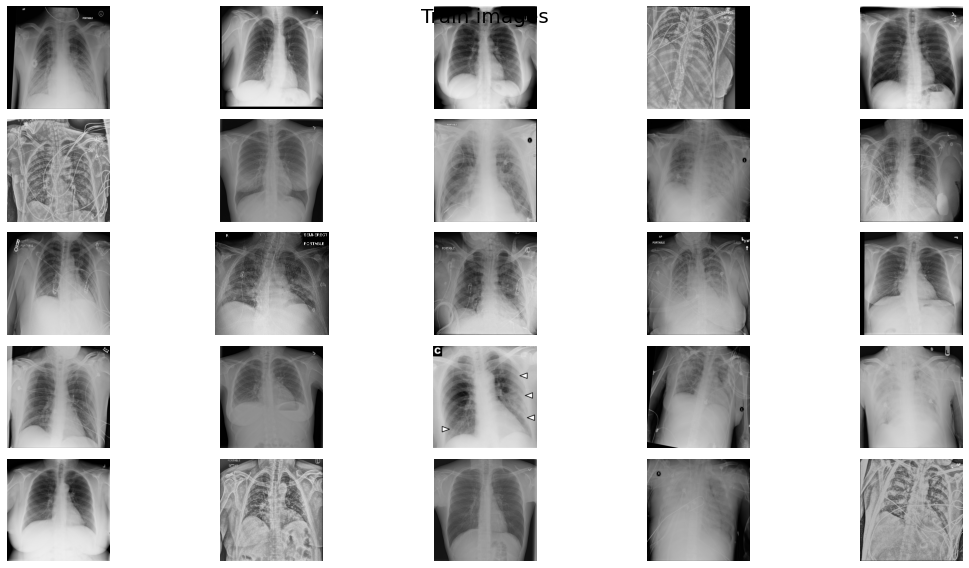

In [ ]:
display_multiple_img(train_images_path[0:25], 5, 5,"Train images")

รูปภาพของ testing set 25 รูปแรก

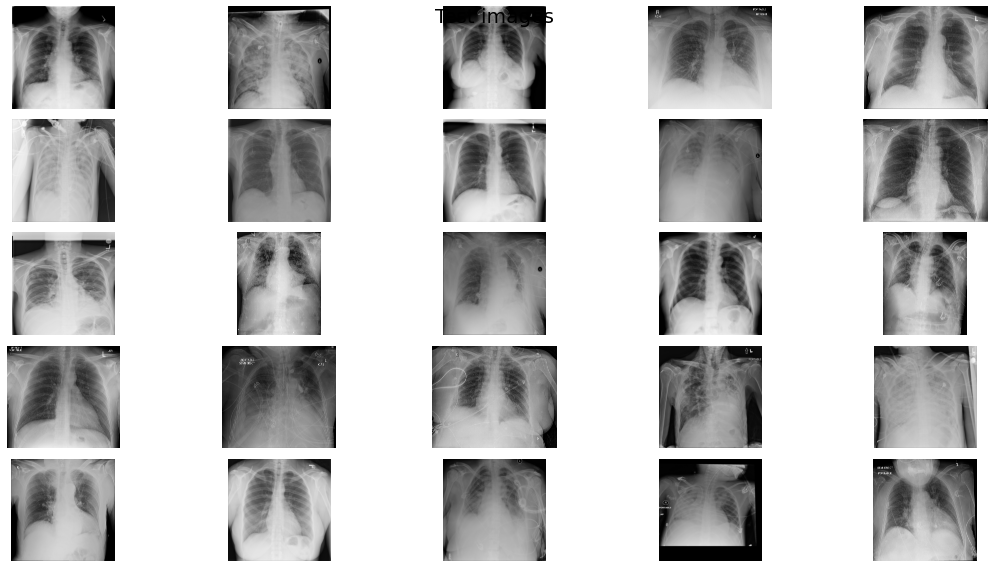

In [ ]:
display_multiple_img(test_images_path[0:25], 5, 5,"Test images")

In [ ]:
im = cv2.imread('/content/train/000001-1.jpg')
print(type(im))
print(im.shape)
print(type(im.shape))

<class 'numpy.ndarray'>
(768, 968, 3)
<class 'tuple'>


In [ ]:
def count_values(df,col,top=False):
    df = pd.DataFrame(df[col].value_counts().reset_index().values,columns=[col, "counts"])
    if top==True: df=df[:10]
    return df

def intermediate_df(col, labels, sizes):
    d = pd.DataFrame()
    d[col] = labels
    d['counts'] = sizes
    return d

ต่อจากนั้นจะทำการเช็คข้อมูลใน training set ว่าแต่ละ class มีจำนวนเท่าไหร่บ้าง

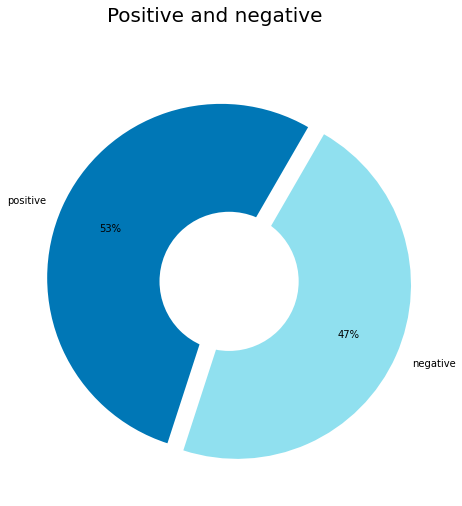

In [ ]:
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Positive and negative', size = 20)
explode = (0.05, 0.05)
labels = list(train_df.labels.value_counts().index)
sizes = train_df.labels.value_counts().values
ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.7, colors=["#0077b6","#90e0ef"])
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

จากรูป pie chart ด้านบน จะเห็นได้ว่ามีข้อมูลที่เป็น positive อยู่ทั้งหมด 53% ของ training set และ negative ทั้งหมด 47% ของ training set ซึงจำนวนข้อมูลของ class ทั้งสองมีไม่แคกค่างกันมากนัก จึงอาจจะไม่ส่งผลในเรื่องของ imbalance data และไม่จำเป็นต้องทำ sampling เพิ่มข้อมูลใน class ใด class หนึ่ง

In [ ]:
def sep_img(train_df, train_images_path, n_row, status):
    path_pos = []
    train_df_segment = train_df[train_df["labels"] == status][:n_row]
    ls_positive = train_df_segment.filename.to_list()
    for i in ls_positive:
        for j in train_images_path:
            if i in j :
                path_pos.append(j)
    return path_pos

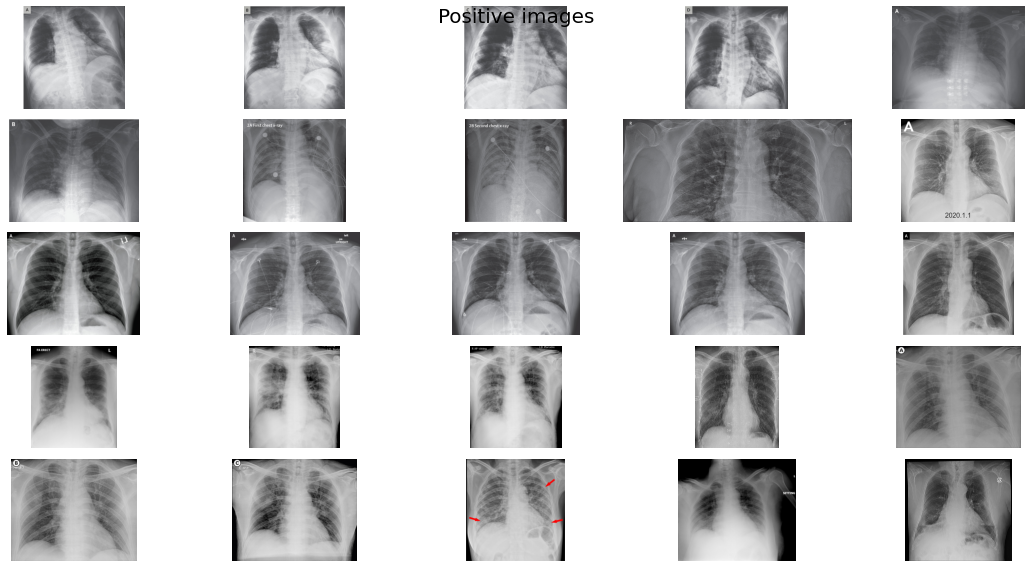

In [ ]:
display_multiple_img(sep_img(train_df, train_images_path, 25, "positive"), 5, 5,"Positive images")

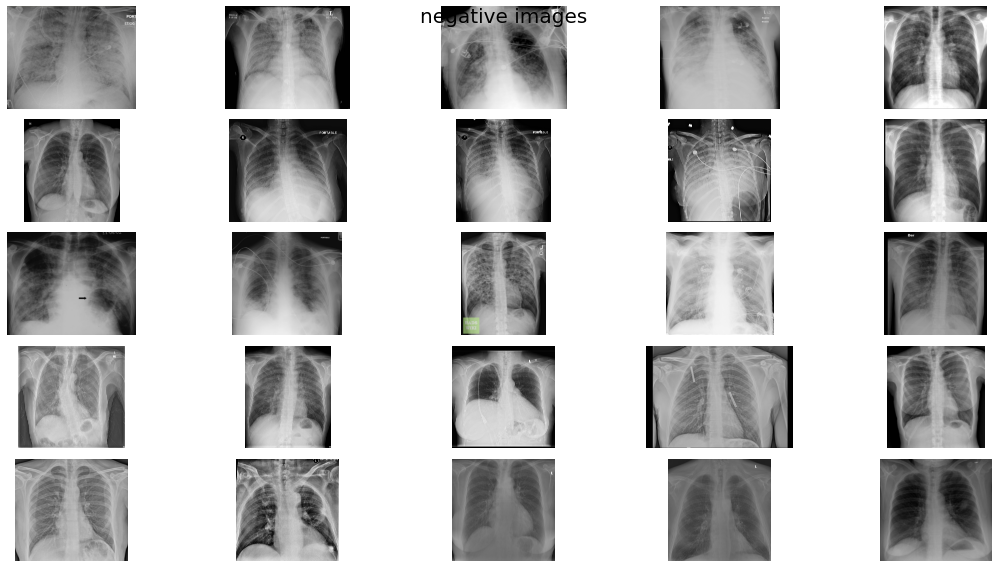

In [ ]:
display_multiple_img(sep_img(train_df, train_images_path, 25, "negative"), 5, 5,"negative images")

# Generate data for training 

In [ ]:
file_count = 10000
samples = []
for category in train_df['labels'].unique():    
    category_slice = train_df.query("labels == @category")    
    samples.append(category_slice.sample(file_count, replace=False,random_state=1))
train_df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
print ( train_df['labels'].value_counts())
print (len(train_df))

positive    10000
negative    10000
Name: labels, dtype: int64
20000


In [ ]:
def create_path_col(filename, images_path):
    for path in images_path:
        if filename in path:
            return path

In [ ]:
train_df["path"] = train_df.apply(lambda train_df: create_path_col(train_df["filename"], train_images_path), axis = 1)
test_df["path"] = test_df.apply(lambda test_df: create_path_col(test_df["filename"], test_images_path), axis = 1)

In [ ]:
train_df.head()

,patient_id,filename,labels,data_source,path
0,A485823,A485823-01-06-1901-NA-CHEST_AP_PORTABLE-06069-...,positive,stonybrook,/content/train/A485823-01-06-1901-NA-CHEST_AP_...
1,A943106,A943106-01-29-1901-NA-CHEST_AP_VIEWONLY-85212-...,positive,stonybrook,/content/train/A943106-01-29-1901-NA-CHEST_AP_...
2,0c166e46-6e25-4f59-9743-6c60828c7c77,0c166e46-6e25-4f59-9743-6c60828c7c77.png,negative,rsna,/content/train/0c166e46-6e25-4f59-9743-6c60828...
3,A858373,A858373-01-25-1901-NA-CHEST_AP_PORT-48501-1.00...,positive,stonybrook,/content/train/A858373-01-25-1901-NA-CHEST_AP_...
4,374b2ddb-10f8-4fb7-a745-3ecf886af10c,374b2ddb-10f8-4fb7-a745-3ecf886af10c.png,negative,rsna,/content/train/374b2ddb-10f8-4fb7-a745-3ecf886...


In [ ]:
test_df.head()

,patient_id,filename,labels,data_source,path
0,419639-003251,MIDRC-RICORD-1C-419639-003251-46647-0.png,positive,ricord,/content/test/MIDRC-RICORD-1C-419639-003251-46...
1,419639-001464,MIDRC-RICORD-1C-419639-001464-39871-0.png,positive,ricord,/content/test/MIDRC-RICORD-1C-419639-001464-39...
2,419639-000918,MIDRC-RICORD-1C-419639-000918-78965-0.png,positive,ricord,/content/test/MIDRC-RICORD-1C-419639-000918-78...
3,419639-003318,MIDRC-RICORD-1C-419639-003318-64285-0.png,positive,ricord,/content/test/MIDRC-RICORD-1C-419639-003318-64...
4,419639-001015,MIDRC-RICORD-1C-419639-001015-81591-0.png,positive,ricord,/content/test/MIDRC-RICORD-1C-419639-001015-81...


In [ ]:
train_split, valid_split = train_test_split(train_df, train_size=0.9, random_state=0, shuffle=True)

In [ ]:
print(f"Negative and positive values of train: {train_split['labels'].value_counts()}")
print(f"Negative and positive values of validation: {valid_split['labels'].value_counts()}")
print(f"Negative and positive values of test: {test_df['labels'].value_counts()}")

Negative and positive values of train: negative    9006
positive    8994
Name: labels, dtype: int64
Negative and positive values of validation: positive    1006
negative     994
Name: labels, dtype: int64
Negative and positive values of test: positive    200
negative    200
Name: labels, dtype: int64


In [ ]:
from keras_preprocessing.image import ImageDataGenerator
batch_size = 64

training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_dataframe(
    dataframe = train_split,
    x_col = "path",
    y_col = "labels",
    target_size=(256,256),
    class_mode='binary',
    batch_size= batch_size,
    seed = 123,
)

validation_generator = training_datagen.flow_from_dataframe(
    dataframe = valid_split,
    x_col = "path",
    y_col = "labels",
    target_size=(256,256),
    class_mode='binary',
    batch_size= batch_size,
    seed = 123,
)

test_generator = validation_datagen.flow_from_dataframe(
    dataframe = test_df,
    x_col = "path",
    y_col = "labels",
    target_size=(256,256),
    class_mode='binary',
    seed = 123
)

Found 18000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


In [ ]:
length= len(test_df) # determine test batch size and test steps such that test_batch_size X test_steps = number of test samples
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=batch_size],reverse=True)[0] 

test_gen = validation_datagen.flow_from_dataframe(
    dataframe = test_df,
    x_col = "path",
    y_col = "labels",
    target_size=(256,256),
    class_mode='binary',
    batch_size= test_batch_size,
    seed = 123
)

Found 400 validated image filenames belonging to 2 classes.


In [ ]:
test_batch_size

50

In [ ]:
class_dict=train_generator.class_indices
classes=list( class_dict.keys()) 
class_count=len(classes)

In [ ]:
class_count

2

# Create model and training 

In [ ]:
inception_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=(256,256,3),include_top=False,weights='imagenet')
resnetv2_model = tf.keras.applications.resnet_v2.ResNet50V2(input_shape=(256,256,3),include_top=False,weights='imagenet')
vgg_model = tf.keras.applications.vgg16.VGG16(input_shape=(256,256,3),include_top=False,weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in inception_model.layers:
    layer.trainable = False
    
for layer in resnetv2_model.layers:
    layer.trainable = False
    
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
tf.random.set_seed(123)

model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(4, 4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_inception = tf.keras.models.Sequential([
    inception_model,
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_resnetv2 = tf.keras.models.Sequential([
    resnetv2_model,
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_vgg = tf.keras.models.Sequential([
    vgg_model,
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_cnn.summary()

model_inception.summary()

model_resnetv2.summary()

model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dropout (Dropout)           (None, 57600)             0

In [ ]:
# Set the training parameters
base_learning_rate = 0.001

model_cnn.compile(loss = 'BinaryCrossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=base_learning_rate), metrics=['accuracy'])
model_inception.compile(loss = 'BinaryCrossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=base_learning_rate), metrics=['accuracy'])
model_resnetv2.compile(loss = 'BinaryCrossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=base_learning_rate), metrics=['accuracy'])
model_vgg.compile(loss = 'BinaryCrossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=base_learning_rate), metrics=['accuracy'])

callbacks_cnn = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)
]

callbacks_inception = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_inception.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)
]

callbacks_resnetv2 = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_resnetv2.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)
]

callbacks_vgg = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_vgg.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)
]

In [ ]:
def count_label(list):
    zero = 0
    one = 0
    for i in list:
        if i == 0 :
            zero += 1
        else : 
            one += 1
    return zero, one

In [ ]:
count_label(train_generator.labels)

(9006, 8994)

In [ ]:
history_cnn = model_cnn.fit(train_generator, epochs = 10, validation_data = validation_generator, verbose = 1, callbacks= callbacks_cnn)

Epoch 1/10
282/282 [==============================] - 537s 2s/step - loss: 0.6312 - accuracy: 0.6602 - val_loss: 0.5224 - val_accuracy: 0.7695 - lr: 0.0010
Epoch 2/10
282/282 [==============================] - 521s 2s/step - loss: 0.4425 - accuracy: 0.7869 - val_loss: 0.4022 - val_accuracy: 0.7940 - lr: 0.0010
Epoch 3/10
282/282 [==============================] - 519s 2s/step - loss: 0.3798 - accuracy: 0.8279 - val_loss: 0.3794 - val_accuracy: 0.8310 - lr: 0.0010
Epoch 4/10
282/282 [==============================] - 516s 2s/step - loss: 0.3586 - accuracy: 0.8407 - val_loss: 0.3089 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/10
282/282 [==============================] - 516s 2s/step - loss: 0.3391 - accuracy: 0.8517 - val_loss: 0.3229 - val_accuracy: 0.8680 - lr: 0.0010
Epoch 6/10
282/282 [==============================] - 519s 2s/step - loss: 0.3192 - accuracy: 0.8626 - val_loss: 0.2973 - val_accuracy: 0.8785 - lr: 0.0010
Epoch 7/10
282/282 [==============================] - 521s 2s/st

In [ ]:
history_inception = model_inception.fit(train_generator, epochs = 5, validation_data = validation_generator, verbose = 1, callbacks= callbacks_inception)

Epoch 1/5
563/563 [==============================] - 536s 943ms/step - loss: 0.3412 - accuracy: 0.8517 - val_loss: 0.2722 - val_accuracy: 0.8865 - lr: 0.0010
Epoch 2/5
563/563 [==============================] - 528s 937ms/step - loss: 0.2912 - accuracy: 0.8793 - val_loss: 0.2723 - val_accuracy: 0.8865 - lr: 0.0010
Epoch 3/5
563/563 [==============================] - 528s 938ms/step - loss: 0.2738 - accuracy: 0.8867 - val_loss: 0.2454 - val_accuracy: 0.8930 - lr: 0.0010
Epoch 4/5
563/563 [==============================] - 526s 935ms/step - loss: 0.2692 - accuracy: 0.8886 - val_loss: 0.2542 - val_accuracy: 0.8970 - lr: 0.0010
Epoch 5/5
563/563 [==============================] - 527s 936ms/step - loss: 0.2523 - accuracy: 0.8955 - val_loss: 0.2432 - val_accuracy: 0.9055 - lr: 0.0010


In [ ]:
history_resnetv2 = model_resnetv2.fit(train_generator, epochs = 5, validation_data = validation_generator, verbose = 1, callbacks= callbacks_resnetv2)

Epoch 1/5
563/563 [==============================] - 536s 948ms/step - loss: 0.2508 - accuracy: 0.8989 - val_loss: 0.2495 - val_accuracy: 0.8965 - lr: 0.0010
Epoch 2/5
563/563 [==============================] - 541s 962ms/step - loss: 0.2511 - accuracy: 0.9005 - val_loss: 0.2349 - val_accuracy: 0.9080 - lr: 0.0010
Epoch 3/5
563/563 [==============================] - 526s 934ms/step - loss: 0.2457 - accuracy: 0.9014 - val_loss: 0.2419 - val_accuracy: 0.8935 - lr: 0.0010
Epoch 4/5
563/563 [==============================] - 525s 932ms/step - loss: 0.2424 - accuracy: 0.9024 - val_loss: 0.2308 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 5/5
563/563 [==============================] - 524s 930ms/step - loss: 0.2374 - accuracy: 0.9024 - val_loss: 0.2186 - val_accuracy: 0.9140 - lr: 0.0010


In [ ]:
# history_vgg = model_vgg.fit(train_generator, epochs = 5, validation_data = validation_generator, verbose = 1, callbacks= callbacks_vgg)

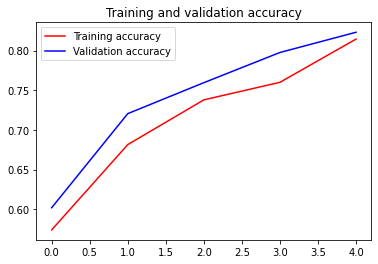

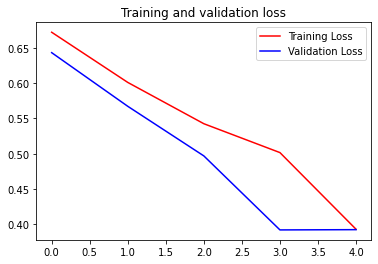

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

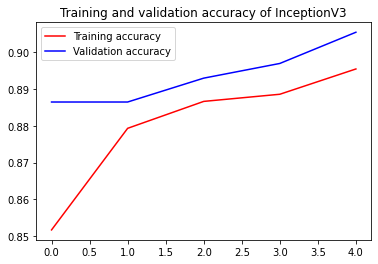

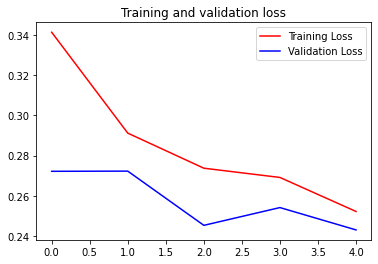

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc_inception = history_inception.history['accuracy']
val_acc_inception = history_inception.history['val_accuracy']
loss_inception = history_inception.history['loss']
val_loss_inception = history_inception.history['val_loss']

epochs = range(len(acc_inception))

plt.plot(epochs, acc_inception, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_inception, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy of InceptionV3')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss_inception, 'r', label='Training Loss')
plt.plot(epochs, val_loss_inception, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

<Figure size 432x288 with 0 Axes>

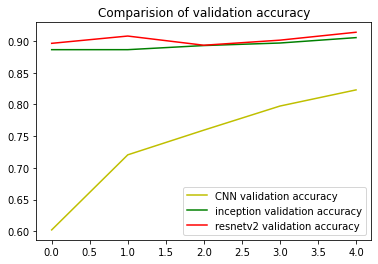

<Figure size 432x288 with 0 Axes>

In [ ]:
acc_cnn = history_cnn.history['val_accuracy']
acc_inception = history_inception.history['val_accuracy']
acc_resnetv2 = history_resnetv2.history['val_accuracy']
# acc_vgg = history_vgg.history['val_accuracy']


plt.plot(epochs, acc_cnn, 'y', label='CNN validation accuracy')
plt.plot(epochs, acc_inception, 'g', label='inception validation accuracy')
plt.plot(epochs, acc_resnetv2, 'r', label='resnetv2 validation accuracy')
# plt.plot(epochs, acc_vgg, 'b', label='vgg validation accuracy')
plt.title('Comparision of validation accuracy')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

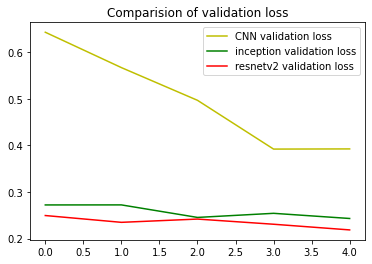

<Figure size 432x288 with 0 Axes>

In [ ]:
loss_cnn = history_cnn.history['val_loss']
loss_inception = history_inception.history['val_loss']
loss_resnetv2 = history_resnetv2.history['val_loss']
# loss_vgg = history_vgg.history['val_loss']


plt.plot(epochs, loss_cnn, 'y', label='CNN validation loss')
plt.plot(epochs, loss_inception, 'g', label='inception validation loss')
plt.plot(epochs, loss_resnetv2, 'r', label='resnetv2 validation loss')
# plt.plot(epochs, loss_vgg, 'b', label='vgg validation loss')
plt.title('Comparision of validation loss')
plt.legend(loc=0)
plt.figure()

# Finetuning model 

In [ ]:
model_resnetv2.trainable = True  

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(model_resnetv2.layers))

# Fine-tune from this layer onwards
fine_tune_at = 200

# Freeze all the layers before the `fine_tune_at` layer
for layer in model_resnetv2.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  5


In [ ]:
model_inception.compile(loss = 'BinaryCrossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=base_learning_rate), metrics=['accuracy'])

callbacks_inception_fine = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model_inception_fine.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)
]

In [ ]:
model_inception.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22,065,185
Trainable params: 15,066,689
Non-trainable params: 6,998,496
__________________________________

In [ ]:
len(model_inception.trainable_variables)

70

In [ ]:
fine_tune_epochs = 10
initial_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model_inception.fit(train_generator,
                         epochs=total_epochs,
                         initial_epoch=history_inception.epoch[-1],
                         validation_data=validation_generator)

Epoch 5/10
750/750 [==============================] - 994s 1s/step - loss: 0.0977 - accuracy: 0.9664 - val_loss: 1.8264 - val_accuracy: 0.7600
Epoch 6/10
750/750 [==============================] - 965s 1s/step - loss: 0.0482 - accuracy: 0.9832 - val_loss: 1.6963 - val_accuracy: 0.7722
Epoch 7/10
750/750 [==============================] - 958s 1s/step - loss: 0.0381 - accuracy: 0.9863 - val_loss: 1.2561 - val_accuracy: 0.8067
Epoch 8/10
750/750 [==============================] - 938s 1s/step - loss: 0.0367 - accuracy: 0.9867 - val_loss: 1.0672 - val_accuracy: 0.8166
Epoch 9/10
750/750 [==============================] - 942s 1s/step - loss: 0.0302 - accuracy: 0.9893 - val_loss: 1.1502 - val_accuracy: 0.8237
Epoch 10/10
750/750 [==============================] - 938s 1s/step - loss: 0.0261 - accuracy: 0.9913 - val_loss: 1.3649 - val_accuracy: 0.7824


# Predict on test set 

In [ ]:
# model_cnn = tf.keras.models.load_model('./covid_classifier_model.h5')
model_resnetv2 = tf.keras.models.load_model('/content/covid_classifier_model_resnetv2.h5')
# model_cnn.evaluate(test_generator)
model_resnetv2.evaluate(test_generator)

13/13 [==============================] - 23s 2s/step - loss: 0.6498 - accuracy: 0.7075


[0.6497710943222046, 0.7074999809265137]

What is 'from_logits=True' in Keras/TensorFlow Loss Functions? 
- https://stackabuse.com/what-is-fromlogitstrue-in-keras-tensorflow-loss-functions/

Why binary_crossentropy and categorical_crossentropy give different performances for the same problem?
- https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances

Filtering Algorithms for covid-19 CT images
- https://books.google.co.th/books?id=vmsDEAAAQBAJ&pg=PA417&lpg=PA417&dq=unsharp+mask+filter+covid+19&source=bl&ots=0hh0Yy1DVo&sig=ACfU3U0PP0fawgWb4bjxhhlE_T7iZV3Ctg&hl=th&sa=X&ved=2ahUKEwjmpt7x_cj6AhU37TgGHTAqBNsQ6AF6BAgTEAM#v=onepage&q=unsharp%20mask%20filter%20covid%2019&f=false